In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
random.seed(1)

In [4]:
f=file('Colonial_Broadcasting_Company_dataset.csv','r')

In [5]:
tt=[]
for i,el in enumerate(f):
    if i==0:#if we are on the first line, we store the columns' name in an array
        col_name=el.strip().split(',')
    else:#
        tt_temp=[]
        for el1 in el.strip().split(','):
            try:
                tt_temp.append(float(el1))
            except:
                tt_temp.append(el1)        
        tt.append(tt_temp)
# tt=array(tt)

In [6]:
f.close()

In [7]:
tt=array(tt,object)

In [8]:
tt[-10:,:]

array([[79.0, '"CBC"', 10.0, 1.0, 13.8, 1.0, 0.0, 10.2, 16.6],
       [80.0, '"CBC"', 10.0, 7.0, 11.9, 1.0, 0.0, 11.8, 12.2],
       [81.0, '"CBC"', 10.0, 1.0, 14.6, 0.0, 0.0, 14.9, 14.9],
       [82.0, '"CBC"', 11.0, 1.0, 15.8, 1.0, 1.0, 13.4, 17.2],
       [83.0, '"CBC"', 11.0, 1.0, 15.4, 0.0, 1.0, 13.6, 16.8],
       [84.0, '"CBC"', 11.0, 1.0, 12.8, 0.0, 0.0, 12.7, 14.6],
       [85.0, '"CBC"', 12.0, 7.0, 12.8, 0.0, 0.0, 12.0, 18.6],
       [86.0, '"CBC"', 12.0, 1.0, 15.1, 0.0, 0.0, 14.1, 15.5],
       [87.0, '"CBC"', 12.0, 1.0, 11.4, 0.0, 1.0, 11.2, 16.4],
       [88.0, '"CBC"', 12.0, 1.0, 19.1, 1.0, 0.0, 12.6, 15.4]], dtype=object)

In [9]:
tt[:,2:].mean(axis=0)

array([5.875, 4.25, 13.819318181818176, 0.4090909090909091,
       0.4090909090909091, 13.77386363636363, 14.059090909090907], dtype=object)

In [10]:
tt[:,2:].std()

6.3435115452650903

In [11]:
percentile(tt[:,2:],[25, 75], axis = 0)

array([[3.0, 1.0, 11.674999999999999, 0.0, 0.0, 11.95, 12.549999999999999],
       [10.0, 7.0, 15.8, 1.0, 1.0, 15.9, 15.325000000000001]], dtype=object)

In [12]:
percentile(tt[tt[:,1]=='"ABN"', 2:],59,axis=0)

array([5.0, 7.0, 15.5, 0.0, 0.8299999999999983, 16.583, 13.083], dtype=object)

In [13]:
#col_name restituisce le variabili del dataset

In [14]:
col_name

['"Observations "',
 '"Network "',
 '"Month "',
 '"Day "',
 '"Rating"',
 '"Fact "',
 '"Stars "',
 '"Previous rating  "',
 '"Competition "']

In [15]:
y = [tt[tt[:,1]==pippo, 4].mean() for pippo in ['"ABN"','"CBC"','"BBS"']]

In [16]:
y

[14.76052631578947, 13.363333333333335, 12.715]

In [17]:
x = [1,2,3]

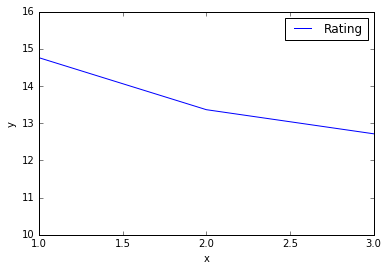

In [18]:
plot(x,y,'-', label='Rating')
ylim(10,16)
xlabel('x')
ylabel('y')
legend()

In [19]:
#vedi soluzione per disegnare istogramma

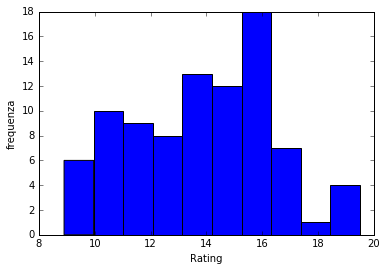

In [20]:
hist(tt[:,4],10)
ylabel('frequenza')
xlabel('Rating')
show()

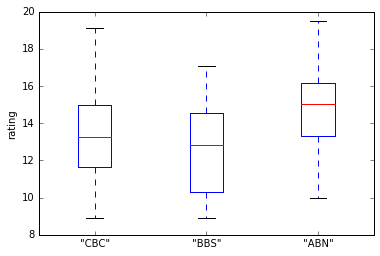

In [21]:
network=set(tt[:,1])
network
boxplot([list(tt[tt[:,1]==netw,4]) for netw in network],labels=network)
ylabel('rating')

In [22]:
col_name

['"Observations "',
 '"Network "',
 '"Month "',
 '"Day "',
 '"Rating"',
 '"Fact "',
 '"Stars "',
 '"Previous rating  "',
 '"Competition "']

(array([1, 2]), <a list of 2 Text xticklabel objects>)

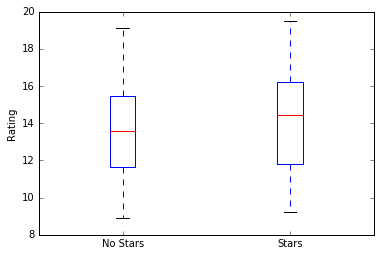

In [23]:
boxplot([list(tt[tt[:,6]==0,4]),list(tt[tt[:,6]>0,4])], labels=['No Stars', 'Stars'])
ylabel('Rating')
xticks()

(array([1, 2]), <a list of 2 Text xticklabel objects>)

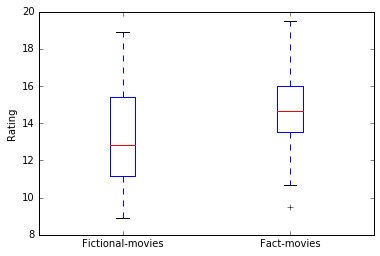

In [24]:
boxplot([list(tt[tt[:,-4]==0,4]),list(tt[tt[:,-4]>0,4])], labels=['Fictional-movies', 'Fact-movies'])
ylabel('Rating')
xticks()

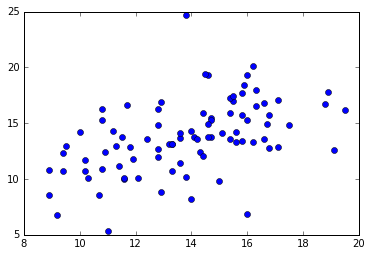

In [25]:
#rating vs previous rating
plot(tt[:,4],tt[:,-2],'o')

In [26]:
from scipy.stats import pearsonr

In [27]:
pearsonr(tt[:,4],tt[:,7])

(0.48410767230660262, 1.7646845258591581e-06)

In [28]:
from scipy.stats import spearmanr

In [29]:
spearmanr(tt[:,4],tt[:,7])

SpearmanrResult(correlation=0.52870439323700247, pvalue=1.1907586936796334e-07)

In [30]:
col_name

['"Observations "',
 '"Network "',
 '"Month "',
 '"Day "',
 '"Rating"',
 '"Fact "',
 '"Stars "',
 '"Previous rating  "',
 '"Competition "']

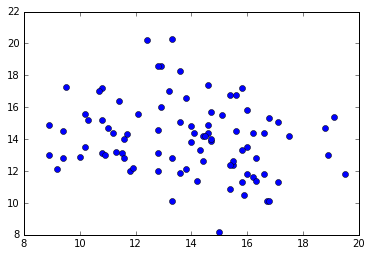

In [31]:
plot(tt[:,4],tt[:,-1],'o')

In [32]:
pearsonr(tt[:,4],tt[:,-1])

(-0.20548568615265045, 0.054780369888899449)

In [33]:
spearmanr(tt[:,4],tt[:,-1])

SpearmanrResult(correlation=-0.23229751312182101, pvalue=0.029415613453713386)

In [34]:
ya=random.rand(237)*50
yb=exp(2.5-ya+random.randn(237)*10)

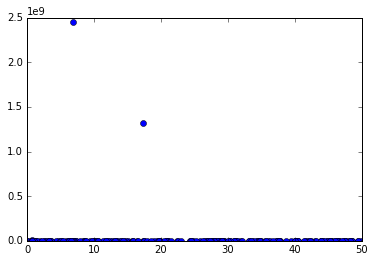

In [35]:
plot(ya, yb,'o')

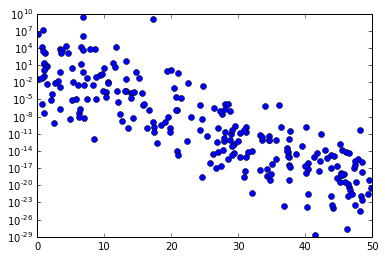

In [36]:
semilogy(ya,yb,'o')

In [37]:
x = list(tt[tt[:,6]==0,4])
y = list(tt[tt[:,6]>0,4])
from scipy import stats
r,p=stats.ks_2samp(x,y)

In [38]:
r

0.20261437908496732

In [39]:
p

0.32178662567692801

In [40]:
# bootstrap
rating=tt[:,4].copy()
star=tt[:,6].copy()

In [41]:
from scipy.stats import ks_2samp

In [42]:
res=[]
for el in range(1000):
    shuffle(star)
    res.append(ks_2samp(rating[star<1],rating[star>=1])[0])

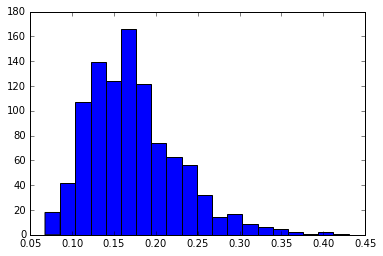

In [43]:
hist(res,20)
show()

In [44]:
print 'more than %g reshuffled samples (over %g) have a KS statistic larger than %g'%(sum(res>ks_2samp(tt[tt[:,6]<1,4],tt[tt[:,6]>=1,4])[0]),len(res),ks_2samp(tt[tt[:,6]<1,4],tt[tt[:,6]>=1,4])[0])

more than 258 reshuffled samples (over 1000) have a KS statistic larger than 0.202614


In [45]:
col_name

['"Observations "',
 '"Network "',
 '"Month "',
 '"Day "',
 '"Rating"',
 '"Fact "',
 '"Stars "',
 '"Previous rating  "',
 '"Competition "']

In [46]:
Fiction = list(tt[tt[:,6]==0,4])
Real = list(tt[tt[:,-3]==1,4])
from scipy import stats
r,p=stats.ks_2samp(Fiction,Real)

In [47]:
r

0.18055555555555558

In [48]:
p

0.48769658743425037

In [49]:
rating=tt[:,4].copy()
fiction=tt[:,-3].copy()

In [70]:
res=[]
for el in range(1000):
    shuffle(star)
    res.append(ks_2samp(rating[fiction==0],rating[fiction>=1])[0])

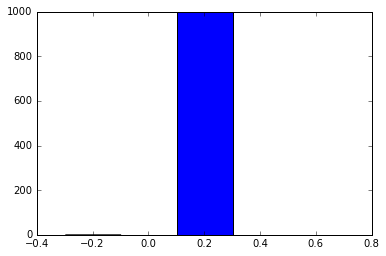

In [71]:
hist(res,5)
show()

In [52]:
import statsmodels.api as sm

In [53]:
res=sm.OLS(tt[:,4].astype(float),tt[:,[-2,-1]].astype(float)).fit()

In [122]:
print res.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1285.
Date:                Thu, 27 Oct 2016   Prob (F-statistic):           8.73e-65
Time:                        16:18:18   Log-Likelihood:                -206.48
No. Observations:                  88   AIC:                             417.0
Df Residuals:                      86   BIC:                             421.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.6295      0.064      9.797      0.0

In [121]:
tt.shape

(88, 9)

In [54]:
import statsmodels

In [55]:
statsmodels.__version__

'0.6.1'

In [57]:
# rating = 0.6295*previous_rating+0.3557*competition

(5, 25)

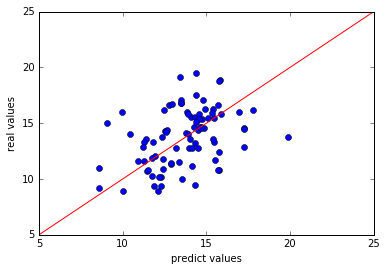

In [58]:
plot(res.fittedvalues,tt[:,4],'o')
plot([0,30],[0,30],'r')
ylabel('real values')
xlabel('predict values')
xlim(5,25)
ylim(5,25)

In [64]:
from statsmodels.tools import add_constant
res=sm.OLS(tt[:,4].astype(float), add_constant(tt[:,[-2,-1]].astype(float))).fit()

In [65]:
print res.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.229
Method:                 Least Squares   F-statistic:                     13.90
Date:                Thu, 27 Oct 2016   Prob (F-statistic):           6.00e-06
Time:                        16:28:44   Log-Likelihood:                -194.05
No. Observations:                  88   AIC:                             394.1
Df Residuals:                      85   BIC:                             401.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         10.5757      2.008      5.268      0.0

In [66]:
# togliamo x2 che risulta poco significativa

In [67]:
res=sm.OLS(tt[:,4].astype(float),add_constant(tt[:,[-2]].astype(float))).fit()

In [68]:
print res.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.234
Model:                            OLS   Adj. R-squared:                  0.225
Method:                 Least Squares   F-statistic:                     26.32
Date:                Thu, 27 Oct 2016   Prob (F-statistic):           1.76e-06
Time:                        16:32:03   Log-Likelihood:                -194.75
No. Observations:                  88   AIC:                             393.5
Df Residuals:                      86   BIC:                             398.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          8.5771      1.049      8.175      0.0